In [1]:
# Importing necessary libraries
# We will importing more - as per our needs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <b>Part II: Autoencoders for Anomaly Detection</b><br>
In this part of our assignment, we will implement autoencoder and explore it’s application for anomaly detection. NOTE: The min accuracy to be achieved for this task is 80%.

<b>DATASETS</b><br>
Below is a list of datasets. Select ONE dataset based on your preference.<br><br>
    • `Yahoo S5 Dataset` : real server logs from a popular web service, containing various anomalies such as spikes, dips, and shifts in user traffic<br>
    • `Hard Drive Test Data` : Daily Snapshot of Each Operational Hard Drive<br>
    • `Numenta Anomaly Benchmark` : dataset for evaluating anomaly detection algorithms, featuring a variety of time-series data from different domains, including financial market data.

In [2]:
# We are choing a dataset from "Numenta Anomaly Becnhmark" - exchange-4_cpc_results.csv

### <b>STEPS :</b>

1. Select one dataset from the list above. Briefly justify your choice in the report (e.g., relevance to your field of study)

In [3]:
'''
We chose the dataset (exchange-4_cpc_results.csv) from "Numenta Anomaly Benchmark"
datasets because of the following reasons :

Real-world Applications: Understanding the dynamics of ad clicks, cost-per-click
(CPC) is critical for businesses and advertisers. By studying this dataset, AI
methodologies can be deployed to enhance advertising campaigns, identify anomalies
in click patterns, and refine online marketing strategies.

Interdisciplinary Insights: The intersection of AI, online advertising, and data
analytics offers an interdisciplinary perspective that is invaluable for CSE students.
Analyzing this dataset not only enables the application of AI techniques but also
necessitates comprehension of online advertising mechanisms, data preprocessing,
feature engineering, and model assessment, fostering a well-rounded problem-solving
approach.
'''

'\nWe chose the dataset (exchange-4_cpc_results.csv) from "Numenta Anomaly Benchmark"\ndatasets because of the following reasons :\n\nReal-world Applications: Understanding the dynamics of ad clicks, cost-per-click\n(CPC) is critical for businesses and advertisers. By studying this dataset, AI\nmethodologies can be deployed to enhance advertising campaigns, identify anomalies\nin click patterns, and refine online marketing strategies.\n\nInterdisciplinary Insights: The intersection of AI, online advertising, and data\nanalytics offers an interdisciplinary perspective that is invaluable for CSE students.\nAnalyzing this dataset not only enables the application of AI techniques but also\nnecessitates comprehension of online advertising mechanisms, data preprocessing,\nfeature engineering, and model assessment, fostering a well-rounded problem-solving\napproach.\n'

<br>

2. Data exploration and preprocessing:<br>

2(A). Read, preprocess, and print the main statistics about the dataset

In [4]:
# Loading the dataset

df = pd.read_csv("DL_A2_Part2_Dataset.csv")

In [5]:
# Showing the first few lines of the dataset

df.head(10)

,timestamp,value
0,2011-07-01 0:15:01,0.091795
1,2011-07-01 1:15:01,0.074414
2,2011-07-01 2:15:01,0.056984
3,2011-07-01 3:15:01,0.071225
4,2011-07-01 4:15:01,0.045466
5,2011-07-01 5:15:01,0.050627
6,2011-07-01 6:15:01,0.061599
7,2011-07-01 7:15:01,0.064958
8,2011-07-01 8:15:01,0.066818
9,2011-07-01 9:15:01,0.065824


In [6]:
# Printing the shape of the data

df.shape

(1643, 2)

In [7]:
# So this dataset has 1643 rows and 2 columns only

In [8]:
df.dtypes

timestamp     object
value        float64
dtype: object

In [9]:
# As we can infer, the first column holds nothing but timestamps
# We need to split the date and time - to separate columns

# Converting 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

'''
FEATURE ENGINEERING
'''

# Creating new columns for splitting timestamps into numerous features
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute

# Showing the first few lines of the dataset with date and time columns
df.head(10)

,timestamp,value,year,month,day,hour,minute
0,2011-07-01 00:15:01,0.091795,2011,7,1,0,15
1,2011-07-01 01:15:01,0.074414,2011,7,1,1,15
2,2011-07-01 02:15:01,0.056984,2011,7,1,2,15
3,2011-07-01 03:15:01,0.071225,2011,7,1,3,15
4,2011-07-01 04:15:01,0.045466,2011,7,1,4,15
5,2011-07-01 05:15:01,0.050627,2011,7,1,5,15
6,2011-07-01 06:15:01,0.061599,2011,7,1,6,15
7,2011-07-01 07:15:01,0.064958,2011,7,1,7,15
8,2011-07-01 08:15:01,0.066818,2011,7,1,8,15
9,2011-07-01 09:15:01,0.065824,2011,7,1,9,15


In [10]:
df.head(10)

,timestamp,value,year,month,day,hour,minute
0,2011-07-01 00:15:01,0.091795,2011,7,1,0,15
1,2011-07-01 01:15:01,0.074414,2011,7,1,1,15
2,2011-07-01 02:15:01,0.056984,2011,7,1,2,15
3,2011-07-01 03:15:01,0.071225,2011,7,1,3,15
4,2011-07-01 04:15:01,0.045466,2011,7,1,4,15
5,2011-07-01 05:15:01,0.050627,2011,7,1,5,15
6,2011-07-01 06:15:01,0.061599,2011,7,1,6,15
7,2011-07-01 07:15:01,0.064958,2011,7,1,7,15
8,2011-07-01 08:15:01,0.066818,2011,7,1,8,15
9,2011-07-01 09:15:01,0.065824,2011,7,1,9,15


In [11]:
# Printing the main statistics

df.describe()

,value,year,month,day,hour,minute
count,1643.000000,1643.0,1643.000000,1643.000000,1643.000000,1643.0
mean,0.086439,2011.0,7.645161,14.846013,11.454047,15.0
std,0.128977,0.0,0.650180,9.250080,6.916911,0.0
min,0.023884,2011.0,7.000000,1.000000,0.000000,15.0
25%,0.055185,2011.0,7.000000,6.000000,5.000000,15.0
50%,0.072820,2011.0,8.000000,14.000000,11.000000,15.0
75%,0.095459,2011.0,8.000000,23.000000,17.000000,15.0
max,3.126852,2011.0,9.000000,31.000000,23.000000,15.0


<br>

2(B). Clean and prepare the data for modeling (e.g. handling missing values, normalization, feature engineering).

In [12]:
# Detecting and Handling missing values in the dataset

missing_values = df.isna().sum()
print(missing_values)

timestamp    0
value        0
year         0
month        0
day          0
hour         0
minute       0
dtype: int64


In [13]:
# Hence, we can see there are no missing values in the dataset

In [14]:
# Applying a simple moving average with a window size of 3
df['value_smoothed'] = df['value'].rolling(window=3).mean()

In [15]:
df.head(10)

,timestamp,value,year,month,day,hour,minute,value_smoothed
0,2011-07-01 00:15:01,0.091795,2011,7,1,0,15,NaN
1,2011-07-01 01:15:01,0.074414,2011,7,1,1,15,NaN
2,2011-07-01 02:15:01,0.056984,2011,7,1,2,15,0.074398
3,2011-07-01 03:15:01,0.071225,2011,7,1,3,15,0.067541
4,2011-07-01 04:15:01,0.045466,2011,7,1,4,15,0.057892
5,2011-07-01 05:15:01,0.050627,2011,7,1,5,15,0.055773
6,2011-07-01 06:15:01,0.061599,2011,7,1,6,15,0.052564
7,2011-07-01 07:15:01,0.064958,2011,7,1,7,15,0.059061
8,2011-07-01 08:15:01,0.066818,2011,7,1,8,15,0.064458
9,2011-07-01 09:15:01,0.065824,2011,7,1,9,15,0.065867


In [16]:
missing_values = df.isna().sum()
print(missing_values)

timestamp         0
value             0
year              0
month             0
day               0
hour              0
minute            0
value_smoothed    2
dtype: int64


In [17]:
# Replacing NaN values with 0 - for the column of "value_smoothed"
df.fillna(0, inplace=True)

In [18]:
df.head(10)

,timestamp,value,year,month,day,hour,minute,value_smoothed
0,2011-07-01 00:15:01,0.091795,2011,7,1,0,15,0.000000
1,2011-07-01 01:15:01,0.074414,2011,7,1,1,15,0.000000
2,2011-07-01 02:15:01,0.056984,2011,7,1,2,15,0.074398
3,2011-07-01 03:15:01,0.071225,2011,7,1,3,15,0.067541
4,2011-07-01 04:15:01,0.045466,2011,7,1,4,15,0.057892
5,2011-07-01 05:15:01,0.050627,2011,7,1,5,15,0.055773
6,2011-07-01 06:15:01,0.061599,2011,7,1,6,15,0.052564
7,2011-07-01 07:15:01,0.064958,2011,7,1,7,15,0.059061
8,2011-07-01 08:15:01,0.066818,2011,7,1,8,15,0.064458
9,2011-07-01 09:15:01,0.065824,2011,7,1,9,15,0.065867


In [19]:
# Normalization/Standardization - Standardizing the 'value' column
mean_value = df['value'].mean()
std_value = df['value'].std()
df['value_standardized'] = (df['value'] - mean_value) / std_value

In [20]:
df.head(5)

,timestamp,value,year,month,day,hour,minute,value_smoothed,value_standardized
0,2011-07-01 00:15:01,0.091795,2011,7,1,0,15,0.000000,0.041527
1,2011-07-01 01:15:01,0.074414,2011,7,1,1,15,0.000000,-0.093236
2,2011-07-01 02:15:01,0.056984,2011,7,1,2,15,0.074398,-0.228372
3,2011-07-01 03:15:01,0.071225,2011,7,1,3,15,0.067541,-0.117958
4,2011-07-01 04:15:01,0.045466,2011,7,1,4,15,0.057892,-0.317678


In [21]:
# Detrending - Differencing to remove linear trend
df['value_detrended'] = df['value'] - df['value'].shift(1)

In [22]:
df.head(5)

,timestamp,value,year,month,day,hour,minute,value_smoothed,value_standardized,value_detrended
0,2011-07-01 00:15:01,0.091795,2011,7,1,0,15,0.000000,0.041527,NaN
1,2011-07-01 01:15:01,0.074414,2011,7,1,1,15,0.000000,-0.093236,-0.017381
2,2011-07-01 02:15:01,0.056984,2011,7,1,2,15,0.074398,-0.228372,-0.017429
3,2011-07-01 03:15:01,0.071225,2011,7,1,3,15,0.067541,-0.117958,0.014241
4,2011-07-01 04:15:01,0.045466,2011,7,1,4,15,0.057892,-0.317678,-0.025759


In [23]:
df.fillna(0, inplace=True)

In [24]:
df.head(5)

,timestamp,value,year,month,day,hour,minute,value_smoothed,value_standardized,value_detrended
0,2011-07-01 00:15:01,0.091795,2011,7,1,0,15,0.000000,0.041527,0.000000
1,2011-07-01 01:15:01,0.074414,2011,7,1,1,15,0.000000,-0.093236,-0.017381
2,2011-07-01 02:15:01,0.056984,2011,7,1,2,15,0.074398,-0.228372,-0.017429
3,2011-07-01 03:15:01,0.071225,2011,7,1,3,15,0.067541,-0.117958,0.014241
4,2011-07-01 04:15:01,0.045466,2011,7,1,4,15,0.057892,-0.317678,-0.025759


In [25]:
# Outlier Detection/Removal - Detecting outliers using Z-score and removing them
z_scores = (df['value'] - df['value'].mean()) / df['value'].std()
df = df[(z_scores < 3) & (z_scores > -3)]

In [26]:
df.head(10)

,timestamp,value,year,month,day,hour,minute,value_smoothed,value_standardized,value_detrended
0,2011-07-01 00:15:01,0.091795,2011,7,1,0,15,0.000000,0.041527,0.000000
1,2011-07-01 01:15:01,0.074414,2011,7,1,1,15,0.000000,-0.093236,-0.017381
2,2011-07-01 02:15:01,0.056984,2011,7,1,2,15,0.074398,-0.228372,-0.017429
3,2011-07-01 03:15:01,0.071225,2011,7,1,3,15,0.067541,-0.117958,0.014241
4,2011-07-01 04:15:01,0.045466,2011,7,1,4,15,0.057892,-0.317678,-0.025759
5,2011-07-01 05:15:01,0.050627,2011,7,1,5,15,0.055773,-0.277663,0.005161
6,2011-07-01 06:15:01,0.061599,2011,7,1,6,15,0.052564,-0.192596,0.010972
7,2011-07-01 07:15:01,0.064958,2011,7,1,7,15,0.059061,-0.166552,0.003359
8,2011-07-01 08:15:01,0.066818,2011,7,1,8,15,0.064458,-0.152133,0.001860
9,2011-07-01 09:15:01,0.065824,2011,7,1,9,15,0.065867,-0.159833,-0.000993


In [27]:
# The above can be considered as the pre-processed data

In [28]:
df.describe()

,value,year,month,day,hour,minute,value_smoothed,value_standardized,value_detrended
count,1632.000000,1632.0,1632.000000,1632.000000,1632.000000,1632.0,1632.000000,1632.000000,1632.000000
mean,0.077563,2011.0,7.644608,14.797794,11.455270,15.0,0.083335,-0.068818,-0.008722
std,0.033408,0.0,0.650365,9.242866,6.928855,0.0,0.065519,0.259025,0.129537
min,0.023884,2011.0,7.000000,1.000000,0.000000,15.0,0.000000,-0.485011,-3.082414
25%,0.055131,2011.0,7.000000,6.000000,5.000000,15.0,0.057751,-0.242739,-0.007781
50%,0.072598,2011.0,8.000000,14.000000,11.000000,15.0,0.074394,-0.107312,-0.000150
75%,0.094879,2011.0,8.000000,23.000000,17.000000,15.0,0.095637,0.065438,0.008274
max,0.368622,2011.0,9.000000,31.000000,23.000000,15.0,1.100468,2.187847,0.266373


<br>

2(C). Use libraries like matplotlib, seaborn, or plotly to create at least 3 informative visualizations that reveal insights about the data and potential anomalies (e.g., histograms, time-series plots, scatter plots).

In [29]:
# Columns in the dataset

df.columns

Index(['timestamp', 'value', 'year', 'month', 'day', 'hour', 'minute',
       'value_smoothed', 'value_standardized', 'value_detrended'],
      dtype='object')

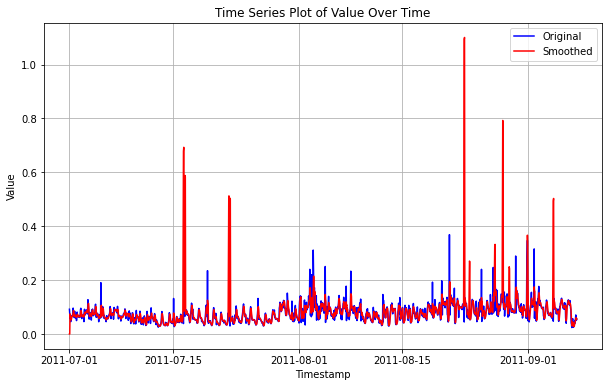

In [30]:
'''
TIME SERIES PLOT
'''

plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['value'], color='blue', label='Original')
plt.plot(df['timestamp'], df['value_smoothed'], color='red', label='Smoothed')
plt.title('Time Series Plot of Value Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

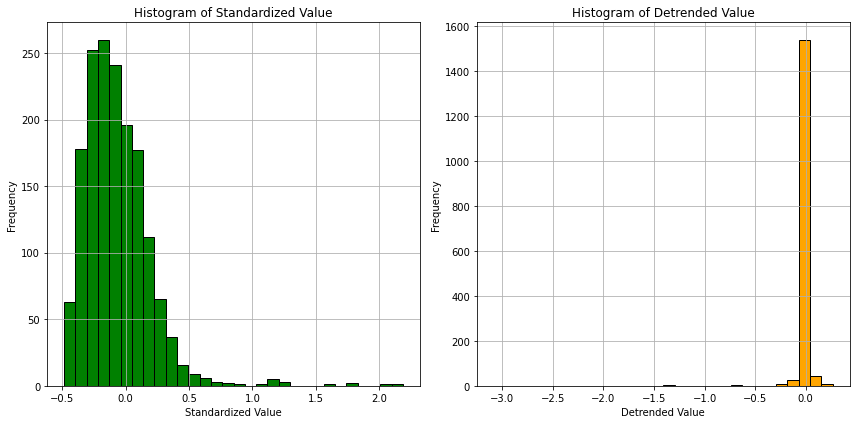

In [31]:
'''
HISTOGRAM
'''

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['value_standardized'], bins=30, color='green', edgecolor='black')
plt.title('Histogram of Standardized Value')
plt.xlabel('Standardized Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(df['value_detrended'], bins=30, color='orange', edgecolor='black')
plt.title('Histogram of Detrended Value')
plt.xlabel('Detrended Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

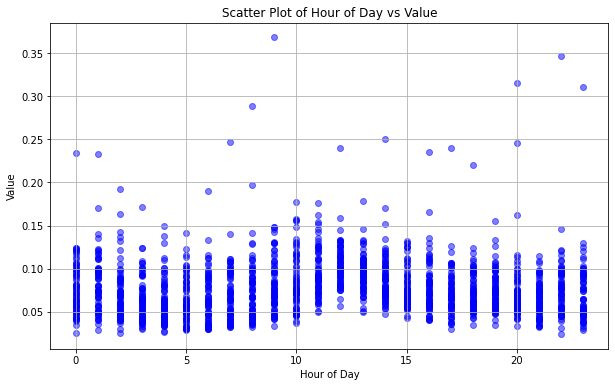

In [32]:
'''
SCATTER PLOT
'''

plt.figure(figsize=(10, 6))
plt.scatter(df['hour'], df['value'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Hour of Day vs Value')
plt.xlabel('Hour of Day')
plt.ylabel('Value')
plt.grid(True)
plt.show()

<br>

2(D). Prepare the dataset for training. Divide the preprocessed data into training, validation, and testing sets.

In [33]:
df = df.drop(columns = 'timestamp')

In [34]:
df.columns

Index(['value', 'year', 'month', 'day', 'hour', 'minute', 'value_smoothed',
       'value_standardized', 'value_detrended'],
      dtype='object')

In [35]:
df.dtypes

value                 float64
year                    int64
month                   int64
day                     int64
hour                    int64
minute                  int64
value_smoothed        float64
value_standardized    float64
value_detrended       float64
dtype: object

In [36]:
from sklearn.model_selection import train_test_split

# Dividing the dataset into features (X) and target variable (y)
X = df.drop(columns=['value'])
y = df['value']

# Splitting the data into training (90%) and remaining (10%) sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=42)

# Splitting the remaining data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.1116557734, shuffle=False, random_state=42)
# Thus the ration becomes ==> Train : Validation : Test = 80 : 10 : 10

# Displaying the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1304, 8) (1304,)
Validation set shape: (164, 8) (164,)
Testing set shape: (164, 8) (164,)


<br>

3. Autoencoder model building:<br>

3(A). Implement a standard Autoencoder or a Variational Autoencoder (VAE) for anomaly detection.

In [37]:
# Importing necessary libraries

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score, mean_squared_error

2024-03-31 18:17:01.419722: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512_VNNI
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 18:17:01.642198: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [38]:
# Defining the autoencoder model
def build_autoencoder(input_dim):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(input_dim)  # Reconstruction layer
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [39]:
from sklearn.preprocessing import StandardScaler

# Normalizing numerical features
scaler = StandardScaler()
X_train_numerical = scaler.fit_transform(X_train)
X_valid_numerical = scaler.transform(X_valid)
X_test_numerical = scaler.transform(X_test)

In [40]:
# Building the autoencoder model
input_dim = X_train_numerical.shape[1]
autoencoder_base = build_autoencoder(input_dim)

2024-03-31 18:17:04.397309: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512_VNNI
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 18:17:05.413864: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31000 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0
2024-03-31 18:17:05.414543: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 31000 MB memory:  -> device: 1, name: Tesla V100-PCIE-32GB, pci bus id: 0000:d8:00.0, compute capability: 7.0


In [41]:
epochs = 50

# Lists to store R2 score and MSE for each epoch during training and validation
train_r2_base = []
train_mse_base = []
valid_r2_base = []
valid_mse_base = []

In [42]:
# Checking for GPU presence
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # If a GPU is available, print the name of the GPU
  for gpu in gpus:
    print("Found a GPU with the name:", gpu.name)
else:
  # If no GPU is available, print a message
  print("No GPU found")

Found a GPU with the name: /physical_device:GPU:0
Found a GPU with the name: /physical_device:GPU:1


In [43]:
# Training loop
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Training the model on GPU
    with tf.device('/GPU:0'):  
        history = autoencoder_base.fit(X_train_numerical, X_train_numerical,
                                  validation_data=(X_valid_numerical, X_valid_numerical),
                                  epochs=1, batch_size=32, verbose=1)

    # Computing R2 score and MSE for training set
    train_pred = autoencoder_base.predict(X_train_numerical)
    train_r2 = r2_score(X_train_numerical[:, 3:], train_pred[:, 3:])
    train_mse = mean_squared_error(X_train_numerical[:, 3:], train_pred[:, 3:])
    train_r2_base.append(train_r2)
    train_mse_base.append(train_mse)
    print(f"Training - R2: {train_r2:.4f}, MSE: {train_mse:.4f}")

    # Computing R2 score and MSE for validation set
    valid_pred = autoencoder_base.predict(X_valid_numerical)
    valid_r2 = r2_score(X_valid_numerical[:, 3:], valid_pred[:, 3:])
    valid_mse = mean_squared_error(X_valid_numerical[:, 3:], valid_pred[:, 3:])
    valid_r2_base.append(valid_r2)
    valid_mse_base.append(valid_mse)
    print(f"Validation - R2: {valid_r2:.4f}, MSE: {valid_mse:.4f}")

Epoch 1/50


2024-03-31 18:17:07.809316: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x147f3c78aed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-31 18:17:07.809423: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2024-03-31 18:17:07.809872: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): Tesla V100-PCIE-32GB, Compute Capability 7.0
2024-03-31 18:17:07.814613: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-31 18:17:07.960989: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


41/41 [==============================] - 0s 1ms/step
Training - R2: 0.2922, MSE: 0.5113
6/6 [==============================] - 0s 2ms/step
Validation - R2: 0.1834, MSE: 0.9621
Epoch 2/50
41/41 [==============================] - 0s 1ms/step
Training - R2: 0.6694, MSE: 0.1320
6/6 [==============================] - 0s 2ms/step
Validation - R2: 0.6056, MSE: 0.3243
Epoch 3/50
41/41 [==============================] - 0s 1ms/step
Training - R2: 0.7594, MSE: 0.0414
6/6 [==============================] - 0s 2ms/step
Validation - R2: 0.7228, MSE: 0.1258
Epoch 4/50
41/41 [==============================] - 0s 1ms/step
Training - R2: 0.7754, MSE: 0.0252
6/6 [==============================] - 0s 2ms/step
Validation - R2: 0.7523, MSE: 0.0771
Epoch 5/50
41/41 [==============================] - 0s 1ms/step
Training - R2: 0.7877, MSE: 0.0128
6/6 [==============================] - 0s 2ms/step
Validation - R2: 0.7711, MSE: 0.0486
Epoch 6/50
41/41 [==============================] - 0s 1ms/step
Training - R

In [44]:
# Testing the model
test_pred = autoencoder_base.predict(X_test_numerical)

# Computing R2 score and MSE for testing set
test_r2_base = r2_score(X_test_numerical[:, 3:], test_pred[:, 3:])
test_mse_base = mean_squared_error(X_test_numerical[:, 3:], test_pred[:, 3:])

print(f"Testing - R2: {test_r2_base:.4f}, MSE: {test_mse_base:.4f}")

6/6 [==============================] - 0s 2ms/step
Testing - R2: 0.7674, MSE: 0.0338


In [45]:
# FOR OUR INFORMATION 🔻

# WHAT IS A GOOD R2-SCORE ?
'''
A "good" R-squared value depends on the context. For example, in social science
research, an R-squared between 0.50 and 0.99 is acceptable, especially when most
explanatory variables are statistically significant. In finance, an R-squared
above 0.7 is generally seen as showing a high level of correlation, whereas a
measure below 0.4 would show a low correlation. In physics and chemistry, scientists
consider 0.7–0.99 a good R2 value.

LINK : https://mpra.ub.uni-muenchen.de/115769/1/MPRA_paper_115769.pdf
'''

# WHAT IS A GOOD MSE SCORE ?
'''
MSE will never be negative since the errors are squared. The value of the error
ranges from zero to infinity. MSE increases exponentially with an increase in
error. A good model will have an MSE value closer to zero.

LINK : https://www.analyticsvidhya.com/blog/2021/10/evaluation-metric-for-regression-models/#:~:text=MSE%20will%20never%20be%20negative,MSE%20value%20closer%20to%20zero.
'''

'\nMSE will never be negative since the errors are squared. The value of the error\nranges from zero to infinity. MSE increases exponentially with an increase in\nerror. A good model will have an MSE value closer to zero.\n\nLINK : https://www.analyticsvidhya.com/blog/2021/10/evaluation-metric-for-regression-models/#:~:text=MSE%20will%20never%20be%20negative,MSE%20value%20closer%20to%20zero.\n'

<br>

3(B). Experiment with architectures. Build and train at least 3 different autoencoder architectures for anomaly detection. Consider experimenting with:<br>
- Different layer types (Dense, LSTM for time series, Conv1D for sequential data)<br>
- Number of hidden layers and units<br>
- Activation functions (ReLU, sigmoid)<br>
<br><br>
4. Model evaluation and training:<br>

4(A). Train each autoencoder architecture using the training data and validation data for monitoring performance.<br>
4(B).Choose appropriate evaluation metrics (e.g., reconstruction error, precision-recall for anomaly classification.<br>
4(C). Compare the performance of the different architectures on the validation set. Discuss which architecture performs best and why (consider factors like reconstruction error and anomaly detection accuracy).

In [55]:
'''
SETUP - 1 : 
- CHANGING THE NUMBER OF HIDDEN LAYERS AND UNITS
'''

# Defining the autoencoder model with different architecture
def build_autoencoder_setup1(input_dim):
    model = keras.Sequential([
        keras.layers.Dense(32, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(input_dim)  # Reconstruction layer
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Building the autoencoder model with different architecture
input_dim = X_train_numerical.shape[1]
autoencoder_setup1 = build_autoencoder_setup1(input_dim)

# Lists to store R2 score and MSE for each epoch during training and validation
train_r2_setup1 = []
train_mse_setup1 = []
valid_r2_setup1 = []
valid_mse_setup1 = []

# Training loop for the modified autoencoder
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Training the model on GPU
    with tf.device('/GPU:0'):  
        history = autoencoder_setup1.fit(X_train_numerical, X_train_numerical,
                                  validation_data=(X_valid_numerical, X_valid_numerical),
                                  epochs=1, batch_size=32, verbose=1)

    # Computing R2 score and MSE for training set
    train_pred = autoencoder_setup1.predict(X_train_numerical)
    train_r2 = r2_score(X_train_numerical[:, 3:], train_pred[:, 3:])
    train_mse = mean_squared_error(X_train_numerical[:, 3:], train_pred[:, 3:])
    train_r2_setup1.append(train_r2)
    train_mse_setup1.append(train_mse)
    print(f"Training - R2: {train_r2:.4f}, MSE: {train_mse:.4f}")

    # Computing R2 score and MSE for validation set
    valid_pred = autoencoder_setup1.predict(X_valid_numerical)
    valid_r2 = r2_score(X_valid_numerical[:, 3:], valid_pred[:, 3:])
    valid_mse = mean_squared_error(X_valid_numerical[:, 3:], valid_pred[:, 3:])
    valid_r2_setup1.append(valid_r2)
    valid_mse_setup1.append(valid_mse)
    print(f"Validation - R2: {valid_r2:.4f}, MSE: {valid_mse:.4f}")


Epoch 1/50
41/41 [==============================] - 0s 1ms/step
Training - R2: 0.1126, MSE: 0.6883
6/6 [==============================] - 0s 2ms/step
Validation - R2: 0.0120, MSE: 1.2289
Epoch 2/50
41/41 [==============================] - 0s 1ms/step
Training - R2: 0.2641, MSE: 0.5371
6/6 [==============================] - 0s 2ms/step
Validation - R2: 0.2203, MSE: 0.9320
Epoch 3/50
41/41 [==============================] - 0s 1ms/step
Training - R2: 0.3669, MSE: 0.4353
6/6 [==============================] - 0s 2ms/step
Validation - R2: 0.3305, MSE: 0.7436
Epoch 4/50
41/41 [==============================] - 0s 1ms/step
Training - R2: 0.4990, MSE: 0.3026
6/6 [==============================] - 0s 2ms/step
Validation - R2: 0.4859, MSE: 0.4955
Epoch 5/50
41/41 [==============================] - 0s 1ms/step
Training - R2: 0.6390, MSE: 0.1628
6/6 [==============================] - 0s 2ms/step
Validation - R2: 0.6140, MSE: 0.2684
Epoch 6/50
41/41 [==============================] - 0s 1ms/step
T

In [60]:
# Testing the model
test_pred_setup1 = autoencoder_setup1.predict(X_test_numerical)

# Computing R2 score and MSE for testing set
test_r2_setup1 = r2_score(X_test_numerical[:, 3:], test_pred_setup1[:, 3:])
test_mse_setup1 = mean_squared_error(X_test_numerical[:, 3:], test_pred_setup1[:, 3:])

print(f"Testing (SETUP - 1) - R2: {test_r2_setup1:.4f}, MSE: {test_mse_setup1:.4f}")

6/6 [==============================] - 0s 2ms/step
Testing (SETUP - 1) - R2: 0.7323, MSE: 0.0652


In [58]:
'''
SETUP - 2 : 
- CHANGING THE NUMBER OF HIDDEN LAYERS AND UNITS
- CHANGING ACTIVATION FUNCTION
'''

# Defining the autoencoder model with different architecture
def build_autoencoder_setup2(input_dim):
    model = keras.Sequential([
        keras.layers.Dense(32, activation='sigmoid', input_shape=(input_dim,)),
        keras.layers.Dense(16, activation='sigmoid'),
        keras.layers.Dense(8, activation='sigmoid'),
        keras.layers.Dense(16, activation='sigmoid'),
        keras.layers.Dense(32, activation='sigmoid'),
        keras.layers.Dense(input_dim)  # Reconstruction layer
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Building the autoencoder model with different architecture
input_dim = X_train_numerical.shape[1]
autoencoder_setup2 = build_autoencoder_setup2(input_dim)

# Lists to store R2 score and MSE for each epoch during training and validation
train_r2_setup2 = []
train_mse_setup2 = []
valid_r2_setup2 = []
valid_mse_setup2 = []

# Training loop for the modified autoencoder
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Training the model on GPU
    with tf.device('/GPU:0'):  
        history = autoencoder_setup2.fit(X_train_numerical, X_train_numerical,
                                  validation_data=(X_valid_numerical, X_valid_numerical),
                                  epochs=1, batch_size=32, verbose=1)

    # Computing R2 score and MSE for training set
    train_pred = autoencoder_setup2.predict(X_train_numerical)
    train_r2 = r2_score(X_train_numerical[:, 3:], train_pred[:, 3:])
    train_mse = mean_squared_error(X_train_numerical[:, 3:], train_pred[:, 3:])
    train_r2_setup2.append(train_r2)
    train_mse_setup2.append(train_mse)
    print(f"Training - R2: {train_r2:.4f}, MSE: {train_mse:.4f}")

    # Computing R2 score and MSE for validation set
    valid_pred = autoencoder_setup2.predict(X_valid_numerical)
    valid_r2 = r2_score(X_valid_numerical[:, 3:], valid_pred[:, 3:])
    valid_mse = mean_squared_error(X_valid_numerical[:, 3:], valid_pred[:, 3:])
    valid_r2_setup2.append(valid_r2)
    valid_mse_setup2.append(valid_mse)
    print(f"Validation - R2: {valid_r2:.4f}, MSE: {valid_mse:.4f}")

Epoch 1/50
41/41 [==============================] - 0s 1ms/step
Training - R2: -0.0082, MSE: 0.8082
6/6 [==============================] - 0s 2ms/step
Validation - R2: -0.1113, MSE: 1.3846
Epoch 2/50
41/41 [==============================] - 0s 1ms/step
Training - R2: -0.0005, MSE: 0.8005
6/6 [==============================] - 0s 2ms/step
Validation - R2: -0.1683, MSE: 1.4640
Epoch 3/50
41/41 [==============================] - 0s 1ms/step
Training - R2: -0.0000, MSE: 0.8000
6/6 [==============================] - 0s 2ms/step
Validation - R2: -0.1471, MSE: 1.4320
Epoch 4/50
41/41 [==============================] - 0s 1ms/step
Training - R2: -0.0009, MSE: 0.8009
6/6 [==============================] - 0s 2ms/step
Validation - R2: -0.1627, MSE: 1.4588
Epoch 5/50
41/41 [==============================] - 0s 1ms/step
Training - R2: 0.0004, MSE: 0.7996
6/6 [==============================] - 0s 2ms/step
Validation - R2: -0.1560, MSE: 1.4464
Epoch 6/50
41/41 [==============================] - 0s 1

In [61]:
# Testing the model
test_pred_setup2 = autoencoder_setup2.predict(X_test_numerical)

# Computing R2 score and MSE for testing set
test_r2_setup2 = r2_score(X_test_numerical[:, 3:], test_pred_setup2[:, 3:])
test_mse_setup2 = mean_squared_error(X_test_numerical[:, 3:], test_pred_setup2[:, 3:])

print(f"Testing (SETUP - 2) - R2: {test_r2_setup2:.4f}, MSE: {test_mse_setup2:.4f}")

6/6 [==============================] - 0s 2ms/step
Testing (SETUP - 2) - R2: 0.2035, MSE: 0.6485


In [62]:
'''
SETUP - 3 : 
- CHANGING THE NUMBER OF HIDDEN LAYERS AND UNITS
- CHANGING ACTIVATION FUNCTION
- ADDING REGULARIZATION (L2)
'''

from tensorflow.keras import regularizers

# Defining the autoencoder model with L2 regularization
def build_autoencoder_setup3(input_dim, l2_reg=0.01):
    model = keras.Sequential([
        keras.layers.Dense(32, activation='sigmoid', kernel_regularizer=regularizers.l2(l2_reg), input_shape=(input_dim,)),
        keras.layers.Dense(16, activation='sigmoid', kernel_regularizer=regularizers.l2(l2_reg)),
        keras.layers.Dense(8, activation='sigmoid', kernel_regularizer=regularizers.l2(l2_reg)),
        keras.layers.Dense(16, activation='sigmoid', kernel_regularizer=regularizers.l2(l2_reg)),
        keras.layers.Dense(32, activation='sigmoid', kernel_regularizer=regularizers.l2(l2_reg)),
        keras.layers.Dense(input_dim)  # Reconstruction layer
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Building the autoencoder model with L2 regularization
input_dim = X_train_numerical.shape[1]
l2_regularization = 0.01
autoencoder_setup3 = build_autoencoder_setup3(input_dim, l2_reg=l2_regularization)

# Lists to store R2 score and MSE for each epoch during training and validation
train_r2_setup3 = []
train_mse_setup3 = []
valid_r2_setup3 = []
valid_mse_setup3 = []

# Training loop for the modified autoencoder
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Training the model on GPU
    with tf.device('/GPU:0'):  
        history = autoencoder_setup3.fit(X_train_numerical, X_train_numerical,
                                  validation_data=(X_valid_numerical, X_valid_numerical),
                                  epochs=1, batch_size=32, verbose=1)

    # Computing R2 score and MSE for training set
    train_pred = autoencoder_setup3.predict(X_train_numerical)
    train_r2 = r2_score(X_train_numerical[:, 3:], train_pred[:, 3:])
    train_mse = mean_squared_error(X_train_numerical[:, 3:], train_pred[:, 3:])
    train_r2_setup3.append(train_r2)
    train_mse_setup3.append(train_mse)
    print(f"Training - R2: {train_r2:.4f}, MSE: {train_mse:.4f}")

    # Computing R2 score and MSE for validation set
    valid_pred = autoencoder_setup3.predict(X_valid_numerical)
    valid_r2 = r2_score(X_valid_numerical[:, 3:], valid_pred[:, 3:])
    valid_mse = mean_squared_error(X_valid_numerical[:, 3:], valid_pred[:, 3:])
    valid_r2_setup3.append(valid_r2)
    valid_mse_setup3.append(valid_mse)
    print(f"Validation - R2: {valid_r2:.4f}, MSE: {valid_mse:.4f}")

Epoch 1/50
41/41 [==============================] - 0s 1ms/step
Training - R2: -0.0159, MSE: 0.8159
6/6 [==============================] - 0s 2ms/step
Validation - R2: -0.1817, MSE: 1.5014
Epoch 2/50
41/41 [==============================] - 0s 1ms/step
Training - R2: -0.0004, MSE: 0.8004
6/6 [==============================] - 0s 2ms/step
Validation - R2: -0.1544, MSE: 1.4453
Epoch 3/50
41/41 [==============================] - 0s 1ms/step
Training - R2: -0.0005, MSE: 0.8005
6/6 [==============================] - 0s 2ms/step
Validation - R2: -0.1515, MSE: 1.4406
Epoch 4/50
41/41 [==============================] - 0s 1ms/step
Training - R2: -0.0007, MSE: 0.8007
6/6 [==============================] - 0s 2ms/step
Validation - R2: -0.1680, MSE: 1.4639
Epoch 5/50
41/41 [==============================] - 0s 1ms/step
Training - R2: -0.0007, MSE: 0.8007
6/6 [==============================] - 0s 2ms/step
Validation - R2: -0.1659, MSE: 1.4592
Epoch 6/50
41/41 [==============================] - 0s 

In [63]:
# Testing the model
test_pred_setup3 = autoencoder_setup3.predict(X_test_numerical)

# Computing R2 score and MSE for testing set
test_r2_setup3 = r2_score(X_test_numerical[:, 3:], test_pred_setup3[:, 3:])
test_mse_setup3 = mean_squared_error(X_test_numerical[:, 3:], test_pred_setup3[:, 3:])

print(f"Testing (SETUP - 3) - R2: {test_r2_setup3:.4f}, MSE: {test_mse_setup3:.4f}")

6/6 [==============================] - 0s 2ms/step
Testing (SETUP - 3) - R2: -0.0679, MSE: 1.0182


In [64]:
# Now let us compare the performance and figure out which 
# setup performed the best

# Comparing R2 scores and MSE scores
results = {
    "base_model": (test_r2_base, test_mse_base),
    "setup1_model": (test_r2_setup1, test_mse_setup1),
    "setup2_model": (test_r2_setup2, test_mse_setup2),
    "setup3_model": (test_r2_setup3, test_mse_setup3)
}

best_setup = max(results.items(), key=lambda x: (x[1][0], -x[1][1]))[0]
best_r2 = results[best_setup][0]
best_mse = results[best_setup][1]

print("Best Setup:", best_setup)
print("Best R2 Score:", best_r2)
print("Best MSE Score:", best_mse)

Best Setup: base_model
Best R2 Score: 0.7673647562381569
Best MSE Score: 0.03379185188636981


<br>

5. Save the weights of the trained network that provides the best results.

In [85]:
# Here, we can say that the base model gave the best performance

# Now we need to save the model 

import pickle

# Saving model architecture to a pickle file
with open("autoencoder_base_model_architecture.pkl", "wb") as f:
    pickle.dump(autoencoder_base.to_json(), f)

# Saving model weights to a pickle file
autoencoder_base.save_weights("autoencoder_base_model_weights.h5")

<br>

6. Discuss the results and provide relevant graphs:<br>
a. Report training accuracy, training loss, validation accuracy, validation loss, testing accuracy, and testing loss.<br>
b. Plot the training and validation accuracy over time (epochs).<br>
c. Plot the training and validation loss over time (epochs).<br>
d. Generate a confusion matrix using the model's predictions on the test set.<br>
e. Calculate and report other evaluation metrics such as Precision, recall and F1 score

In [66]:
# Because this is a regression task - the evaluation metrics were taken as
# R2 score and MSE score

In [68]:
'''
a. Report training, validation and testing R2 scores and MSE scores
'''

print("BASE SETUP 🔻")
print("Training R2 Score:", train_r2_base)
print("Training MSE Score:", train_mse_base)
print("validation R2 Score:", valid_r2_base)
print("Validation MSE Score:", valid_mse_base)
print("Testing R2 Score:", test_r2_base)
print("Testing MSE Score:", test_mse_base)

BASE SETUP 🔻
Training R2 Score: [0.2921958440499102, 0.6693558122733193, 0.7594124709015911, 0.7753752046972118, 0.7877384047303646, 0.7910392497373369, 0.7942422794343105, 0.7940590859100054, 0.7943879276016494, 0.7949924617918771, 0.7955319953653734, 0.7954301264699548, 0.794959508858162, 0.7962544160640493, 0.7953688357735675, 0.7958209355575414, 0.7965335715111768, 0.7965520990432211, 0.7973616236485489, 0.7972293505949821, 0.7970253114236672, 0.7967672004212376, 0.7902659547978436, 0.7943866501440372, 0.7958923668965021, 0.7957932283201344, 0.7972673521779055, 0.7963724133764555, 0.7968161483818326, 0.7983672341531063, 0.7980932196427682, 0.7983492541035853, 0.7986986490367208, 0.7966966216882454, 0.798299247379586, 0.7987647640075362, 0.798752769106111, 0.7986306594170127, 0.7986416498945041, 0.7985611268984469, 0.7907454176860271, 0.7458515248504481, 0.7864505176210808, 0.7964028683195699, 0.7970342725450605, 0.7979634562622895, 0.7985306290832799, 0.794827018350379, 0.796320809

In [70]:
print("SETUP - 1🔻")
print("Training R2 Score:", train_r2_setup1)
print("Training MSE Score:", train_mse_setup1)
print("validation R2 Score:", valid_r2_setup1)
print("Validation MSE Score:", valid_mse_setup1)
print("Testing R2 Score:", test_r2_setup1)
print("Testing MSE Score:", test_mse_setup1)

SETUP - 1🔻
Training R2 Score: [0.11262307421681192, 0.26407582069106905, 0.36690445024463986, 0.4990323803868867, 0.6390217363473439, 0.678852485856742, 0.7121070934076945, 0.7404022171515708, 0.7536304930548704, 0.7641782142976368, 0.7732648533288244, 0.7816024232186985, 0.7855778437780658, 0.7884830870361096, 0.7905081655897263, 0.7914896020821621, 0.79254640229881, 0.7927093313168255, 0.793519415672044, 0.7928093451997005, 0.7940406579538862, 0.7936670143099349, 0.7878231999700293, 0.7947389916675236, 0.795435825147581, 0.7953356367087862, 0.7956256789468632, 0.7955895330362057, 0.795011432500969, 0.7959535606201167, 0.7959886649968922, 0.7956093768198794, 0.7963401616435148, 0.7961633004689112, 0.7956207826987896, 0.795783118684143, 0.7969081497774948, 0.796251566528704, 0.796763905311837, 0.7959130476658192, 0.7966961923802584, 0.7969739771727876, 0.7970560288618765, 0.7954522283376629, 0.7961800114780979, 0.7975667439846562, 0.7970074511030203, 0.797475451096397, 0.79742732414678

In [71]:
print("SETUP - 2🔻")
print("Training R2 Score:", train_r2_setup2)
print("Training MSE Score:", train_mse_setup2)
print("validation R2 Score:", valid_r2_setup2)
print("Validation MSE Score:", valid_mse_setup2)
print("Testing R2 Score:", test_r2_setup2)
print("Testing MSE Score:", test_mse_setup2)

SETUP - 2🔻
Training R2 Score: [-0.008160174252578178, -0.0005072836718987394, -1.1118491562567278e-05, -0.0008613304528785504, 0.000395498457080623, 0.0003909162208585393, 0.0013415982056111276, 0.002675313933721424, 0.005154052930378672, 0.010005479789315564, 0.021062732361413095, 0.03469167213011666, 0.04835051618123183, 0.060027315850171424, 0.07102144678312321, 0.07989415720522497, 0.0888791345364067, 0.09766148840478658, 0.10560037144326573, 0.11443438609046411, 0.11827024518986282, 0.12406863397701658, 0.12741870190212815, 0.1304765082488172, 0.13493697938633503, 0.1365120227167941, 0.14029610696710518, 0.14408509541783385, 0.1451733999131861, 0.14786732061886532, 0.1514457328671541, 0.15562400523121142, 0.16149872120918177, 0.16813616820335692, 0.17232016479986664, 0.17695522532882219, 0.17875708709545912, 0.1827457588064943, 0.18632228696412784, 0.18913269972765184, 0.19270023782536067, 0.19752149215377818, 0.20386655899261794, 0.2098480582358766, 0.21611005730247754, 0.2236646

In [72]:
print("SETUP - 3🔻")
print("Training R2 Score:", train_r2_setup3)
print("Training MSE Score:", train_mse_setup3)
print("validation R2 Score:", valid_r2_setup3)
print("Validation MSE Score:", valid_mse_setup3)
print("Testing R2 Score:", test_r2_setup3)
print("Testing MSE Score:", test_mse_setup3)

SETUP - 3🔻
Training R2 Score: [-0.01591993984562441, -0.0003771857685041624, -0.0004950373272696318, -0.0006714410742187926, -0.0006881921672377445, -0.0006699053434939817, -5.061787632278936e-05, -0.0005038461806263328, -0.0015247696978869297, -0.0004151589556473656, -0.00021552631543628742, -0.0020802521695122422, -0.00038513705208700346, -0.0006117550156326867, -0.0006281346031181024, -0.0009527756244569474, -0.0005280169724978023, -0.00013493061790574855, -0.0005485014111254571, -0.00037243188428242034, -0.0011085288799794757, -0.0003789302484871193, -0.0012339290760430722, -0.0002172185632051793, -0.00036606750755234784, -0.0027272729171662568, -0.0019967879261230783, -6.205735601287899e-05, -0.00023981639781016638, -0.00015623571309668626, -0.0003829753899668997, -0.0004717702067648766, -0.0005003951917708083, -0.0007885162259030132, -0.00020023503889770032, -0.0003806497048123969, -0.0007821528180405046, -0.001346746634799878, -0.000464791311158308, -0.0025382426467106534, -0.00

BASE SETUP🔻


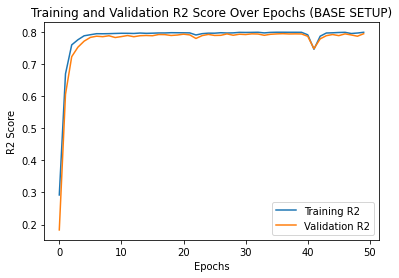

In [74]:
'''
b. Plot training and validation R2 Score over epochs
'''

print("BASE SETUP🔻")
plt.plot(train_r2_base, label='Training R2')
plt.plot(valid_r2_base, label='Validation R2')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('Training and Validation R2 Score Over Epochs (BASE SETUP)')
plt.legend()
plt.show()

SETUP - 1🔻


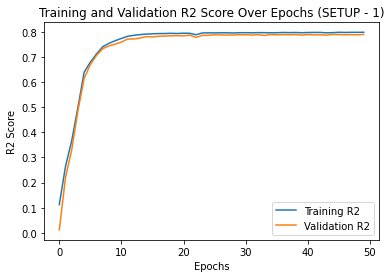

In [75]:
print("SETUP - 1🔻")
plt.plot(train_r2_setup1, label='Training R2')
plt.plot(valid_r2_setup1, label='Validation R2')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('Training and Validation R2 Score Over Epochs (SETUP - 1)')
plt.legend()
plt.show()

SETUP - 2🔻


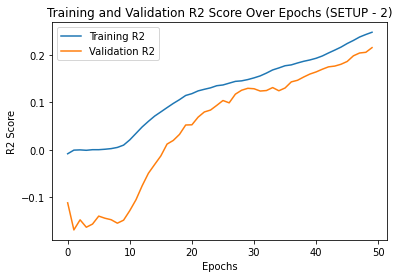

In [76]:
print("SETUP - 2🔻")
plt.plot(train_r2_setup2, label='Training R2')
plt.plot(valid_r2_setup2, label='Validation R2')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('Training and Validation R2 Score Over Epochs (SETUP - 2)')
plt.legend()
plt.show()

SETUP - 3🔻


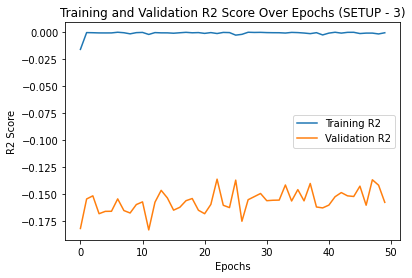

In [77]:
print("SETUP - 3🔻")
plt.plot(train_r2_setup3, label='Training R2')
plt.plot(valid_r2_setup3, label='Validation R2')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('Training and Validation R2 Score Over Epochs (SETUP - 3)')
plt.legend()
plt.show()

BASE SETUP🔻


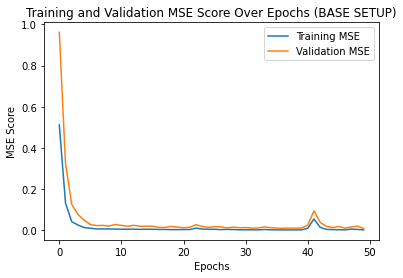

In [78]:
'''
c. Plot training and validation MSE Score over epochs
'''

print("BASE SETUP🔻")
plt.plot(train_mse_base, label='Training MSE')
plt.plot(valid_mse_base, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE Score')
plt.title('Training and Validation MSE Score Over Epochs (BASE SETUP)')
plt.legend()
plt.show()

SETUP - 1🔻


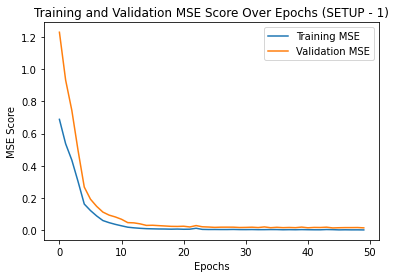

In [79]:
print("SETUP - 1🔻")
plt.plot(train_mse_setup1, label='Training MSE')
plt.plot(valid_mse_setup1, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE Score')
plt.title('Training and Validation MSE Score Over Epochs (SETUP - 1)')
plt.legend()
plt.show()

SETUP - 2🔻


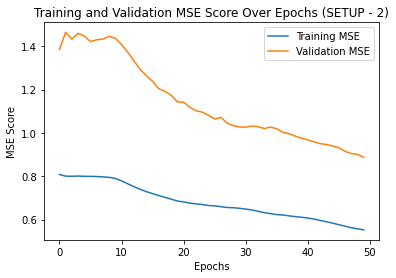

In [80]:
print("SETUP - 2🔻")
plt.plot(train_mse_setup2, label='Training MSE')
plt.plot(valid_mse_setup2, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE Score')
plt.title('Training and Validation MSE Score Over Epochs (SETUP - 2)')
plt.legend()
plt.show()

SETUP - 3🔻


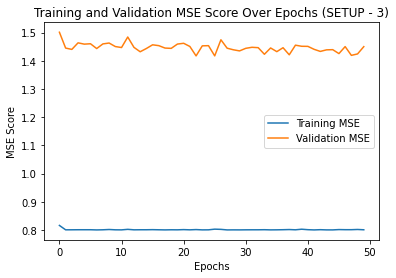

In [81]:
print("SETUP - 3🔻")
plt.plot(train_mse_setup3, label='Training MSE')
plt.plot(valid_mse_setup3, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE Score')
plt.title('Training and Validation MSE Score Over Epochs (SETUP - 3)')
plt.legend()
plt.show()